In [1]:
import cv2 as cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from update_DB import Update_DB
from query import Thumbnails


In [2]:
udb = Update_DB()
udb.preprocess_data()
fm = udb.get_features('fc8')
print(fm.shape)

(106, 1000)


106
5565
11130
0.654924483911
3.36999914332


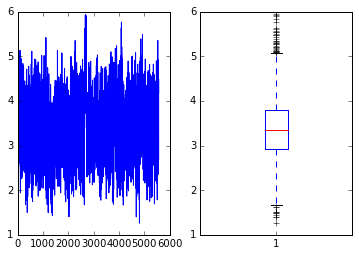

In [47]:
import itertools

num_img = fm.shape[0]
print(num_img)
# number of possible combinations 
# TODO: why -num_img
num_comb = (num_img)*(num_img-1)/2
num_perm = (num_img)*(num_img-1)
print(num_comb)
print(num_perm)

vect_comb = np.zeros([num_comb,3])
for i, comb in enumerate(itertools.combinations(np.arange(num_img), 2)):
    vect_comb[i,0:2] = np.array(comb)
    vect_comb[i,2]   = np.sqrt(np.mean((fm[comb[0],:]-fm[comb[1],:])**2))

vect_perm = np.zeros([num_perm,3])
for i, perm in enumerate(itertools.permutations(np.arange(num_img), 2)):
    vect_perm[i,0:2] = np.array(perm)
    vect_perm[i,2]   = np.sqrt(np.mean((fm[perm[0],:]-fm[perm[1],:])**2))


std_fm = np.std(vect_comb[:,2])
print(std_fm)
print(np.mean(vect_comb[:,2]))
vect_comb[num_comb-10:num_comb,:]
type(vect_comb)
vect_comb[:,2][:].shape
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(vect_comb[:,2][:])
ax2.boxplot(vect_comb[:,2][:])
plt.show()


In [46]:
# get similar combinations list
std_fm = np.std(vect_comb[:,2])
mean_fm = np.mean(vect_comb[:,2])
print(std_fm)
print(np.mean(vect_comb[:,2]))
vect_comb
fm_df = pd.DataFrame(vect_comb[:,:])
fm_df.dtypes
fm_df[[0,1]] = fm_df[[0,1]].astype(int)
comb_similar = fm_df.loc[fm_df[2] <  (mean_fm-2.5*std_fm)]
comb_similar.shape
comb_similar
# np.unique(comb_similar[0:2])

0.654924483911
3.36999914332


,0,1,2
17,0,18,1.618533
313,3,5,1.674739
380,3,72,1.501238
383,3,75,1.511286
1166,11,78,1.680856
1208,12,27,1.499014
1323,13,50,1.685757
1336,13,63,1.494403
1373,13,100,1.432828
2014,21,41,1.628571


In [48]:
# get similar permutations list
fm_df = pd.DataFrame(vect_perm[:,:])
fm_df.dtypes
fm_df[[0,1]] = fm_df[[0,1]].astype(int)
perm_similar = fm_df.loc[fm_df[2] <  (mean_fm-2.5*std_fm)]
perm_similar.shape
perm_similar
# np.unique(comb_similar[0:2])

,0,1,2
17,0,18,1.618533
319,3,5,1.674739
386,3,72,1.501238
389,3,75,1.511286
528,5,3,1.674739
1232,11,78,1.680856
1286,12,27,1.499014
1414,13,50,1.685757
1427,13,63,1.494403
1464,13,100,1.432828


In [76]:
type(perm_similar)
perm_similar[0].unique()

int(perm_similar[perm_similar[0] == 13].values[1, 0])

unique_original_lst = perm_similar[0].unique()
unique_original_lst[5]

13

In [113]:
# plt.imshow(udb.images[0])
# plt.imshow(udb.images[1][0])
def get_similar_img(similar_df):
    unique_original_lst = similar_df[0].unique()
    prev_fnm_lst = []
    
    for unique_idx in unique_original_lst:      
        # similar indexes
        original_idx = unique_idx
#         print(original_idx)
        similar_idxs = [int(i) for i in similar_df[similar_df[0] == unique_idx].values[:, 1] ]
#         print(similar_idxs)
        # similar filenames
        similar_fnms_lst = [udb.img_filenames[original_idx]]
        similar_fnms_lst.extend([udb.img_filenames[idx] for idx in similar_idxs] )
#         print(similar_fnms_lst)

        prev_fnm_lst.append(similar_fnms_lst)
    
    return prev_fnm_lst

In [114]:
print(get_similar_img(perm_similar))


[['2016-06-24 16.37.37.jpg', '2016-06-24 16.38.05.jpg'], ['2016-07-09 15.27.18.jpg', 'IMG_20150628_093848979_HDR.jpg', '2016-07-09 15.47.34.jpg', 'andricgrad.jpg'], ['IMG_20150628_093848979_HDR.jpg', '2016-07-09 15.27.18.jpg'], ['2015-02-11 15.50.44.jpg', 'IMG_20150108_124638428.jpg'], ['2016-07-08 20.23.44.jpg', '2016-07-08 20.22.19.jpg'], ['2015-08-15 14.30.49.jpg', '2016-07-13 17.38.49.jpg', 'P_Monterosso_seaside.jpg', 'IMG_20160531_143739357.jpg'], ['2016-06-24 16.38.05.jpg', '2016-06-24 16.37.37.jpg'], ['2015-03-07 18.50.15.jpg', '2015-03-07 18.50.44.jpg', '2016-05-29 22.47.55.jpg'], ['2016-07-08 20.22.19.jpg', '2016-07-08 20.23.44.jpg'], ['IMG_20141118_123454075.jpg', 'IMG_20160531_143739357.jpg'], ['2015-03-07 18.50.44.jpg', '2015-03-07 18.50.15.jpg'], ['20150830_181302.jpg', 'IMG_20160601_143735105.jpg'], ['2016-07-13 17.38.49.jpg', '2015-08-15 14.30.49.jpg'], ['IMG_20141206_144523810.jpg', 'IMG_20141206_143527909.jpg'], ['2016-05-29 22.47.55.jpg', '2015-03-07 18.50.15.jpg'], [

In [116]:
prev_fnm_lst = get_similar_img(perm_similar)

for img_lst in prev_fnm_lst:
    prev = Thumbnails(227, 2, 5)
    prev.create_preview( img_lst )
    prev.save_to_file('similar_to_' + img_lst[0] + '.png')